# **Text-to-Question Generation using T5**

This project presents a novel question generation pipeline tailored for educational applications. Key features include:

  - Designed a novel question generation pipeline using a fine-tuned T5 model for educational purposes.
  - Leveraged the SQuAD dataset for robust context-question pair preparation and fine-tuning.
  - Implemented preprocessing scripts to process raw text and PowerPoint slides into structured datasets.
  - Fine-tuned T5 with custom datasets and optimized model performance through prompt engineering.
  - Evaluated models with BLEU, ROUGE, semantic similarity, and grammar metrics, achieving significant improvements.
  - Developed user-friendly tools for generating questions from user-provided text or PowerPoint inputs.

---

## Motivation

The motivation was to improve contextual relevance and fluency in the text-to-question generation task. This decision was driven by the following key reasons:

- Impact on Usability: Questions lacking fluency or relevance often require extensive manual corrections, which defeats the purpose of automation. By focusing on these aspects, we can reduce human intervention, and create a system which is more practical and time-efficient for educators.

- Enhanced Learning Outcomes: Improving contextual relevance ensures the generated questions are directly tied to the key concepts, and will prompt better understanding and retention.

By improving these aspects, we not only address a fundamental limitation of current solutions but also create a system that better meets the needs of educators and learners in e-learning environments.

---


## Model Overview

This project leverages the **T5 (Text-To-Text Transfer Transformer)** model for the task of text-to-question generation. The **T5 model** is a transformer-based architecture designed to frame NLP tasks as text-to-text problems.


### Step 1: Data Pre-Processing
- Prepare raw datasets for model input.
- Remove invalid or incomplete entries.
- Group contexts and their related questions.
- Format data to fit the fine-tuning requirements.



### Step 2: Fine-Tuning the Model
- Train the T5 model using `Seq2SeqTrainer` class 
- Training parameters are specified using `Seq2SeqTrainingArguments`
- Implement prompt-based variations for diverse outputs.



### Step 3: Model Evaluation
- Evaluate the model using BLEU, ROUGE, and semantic similarity.
- Analyze grammar consistency in generated questions.



### Step 4: Question Generation
- Generate new questions based on user-provided context (text/PPT).
- Provide diverse output with various prompt types.

---

## **Data**

### Dataset Overview

For this project, we utilized the **SQuAD (Stanford Question Answering Dataset)**, a well-known dataset for NLP tasks, particularly for question-answering and question-generation systems. The dataset contains paragraphs from Wikipedia articles, each paired with a series of question-answer pairs. This makes it ideal for fine-tuning models like T5 for text-to-question generation tasks.

#### Key Features of the Dataset:
- **Context**: A passage of text, typically a paragraph, from which questions are derived.
- **Question**: A question based on the context.
- **Answer**: A span of text within the context that answers the question.

The structure of dataset is as follow:

```json
{
  "context": "Super Bowl 50 was an American football game...",
  "qas": [
    {
      "question": "Which NFL team represented the AFC at Super Bowl 50?",
      "answers": [{"text": "Denver Broncos", "answer_start": 123}]
    },
    {
      "question": "Where did Super Bowl 50 take place?",
      "answers": [{"text": "Levi's Stadium", "answer_start": 234}]
    }
  ]
}

In order to fine-Tune the **T5** model, we will group the questions for the same the same context in the following structure: 

```json 
{
  "context": "Super Bowl 50 was an American football game...",
  "questions": [
    "Which NFL team represented the AFC at Super Bowl 50?",
    "Where did Super Bowl 50 take place?",
    "Which NFL team won Super Bowl 50?",
    "What color was used to emphasize the 50th anniversary of the Super Bowl?"
  ]
}

The SQuAD dataset was accessed via the Hugging Face Datasets library:
[Hugging Face SQuAD Dataset](https://huggingface.co/datasets/rajpurkar/squad)

---

## Code

Our project involves multiple scripts for various stages of data preprocessing, model training, question generation, and evaluation. Below is a detailed summary of each script:

---

### 1. Preprocessing Script

**Purpose**: Cleans and formats the raw data into the required input-output format for T5.

**Key Operations**:
- Load the SQuAD dataset using Hugging Face's datasets library.
- Filter incomplete entries and ensure all context-question pairs are valid.
- Add reasoning instructions to enhance training for reasoning-based questions.




In [12]:
# Sample input transformation
"Context: [context text]\nQuestion: [question text]\n"


'Context: [context text]\nQuestion: [question text]\n'

---

### 2. Data Grouping Script

**Purpose**: Groups questions by their shared context.

**Key Operations**:
- Extract all questions for each context and store them as a list.
- Save the grouped data into a JSON file for further processing.


In [ ]:
grouped_data = defaultdict(list)
for item in data:
    grouped_data[item["context"]].append(item["question"])

---

### 3. Fine-Tuning Script

**Purpose**: Fine-tunes the T5 model on the grouped dataset.

**Key Operations**:
- Tokenize the input and output texts using the T5 tokenizer.
- Use Hugging Face's Seq2SeqTrainer for training with custom arguments.
- Save the fine-tuned model for inference.

**Highlights**:
- Implements beam search for decoding during evaluation.
- Optimizes training with gradient clipping and mixed precision (BF16).


In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./model_output",
    learning_rate=5e-5,
    num_train_epochs=5,
    gradient_accumulation_steps=4
)

---

### 4. Question Generation Script

**Purpose**: Generates questions using the fine-tuned T5 model.

**Key Operations**:
- Supports user-provided contexts from `.txt` or `.pptx` files.
- Applies diverse prompt templates for generating different types of questions (e.g., detailed, critical thinking).

**Example Prompt**:

In [ ]:
"Generate a critical thinking question based on the context: [context text]"

---

### 5. Evaluation Script

**Purpose**: Evaluates the model's generated questions against ground truth using multiple metrics.

**Evaluation Metrics**:
- **BLEU**: Measures n-gram overlap.
- **ROUGE**: Assesses recall-based similarity.
- **Semantic Similarity**: Uses sentence embeddings for contextual alignment.
- **Grammar Issues**: Counts grammatical errors using `language_tool_python`.

**Example Output**:


In [ ]:
{
  "context": "Sample context text",
  "generated_question": "What is photosynthesis?",
  "ground_truth_questions": ["What is photosynthesis?"],
  "bleu_score": 85.67,
  "rouge1": 0.92,
  "semantic_similarity": 0.89,
  "grammar_issues": 0
}

---

### 6. User Input Script

**Purpose**: Allows users to input custom text or presentations and generate questions.

**Key Features**:
- Supports `.txt` and `.pptx` formats.
- Generates multiple questions for each context using sampling-based techniques.


In [ ]:
questions = question_generator(
    prompt_template.format(context=context),
    max_length=50,
    do_sample=True,
    top_k=50
)

---


### Experimental Setup

The goal of the evaluation is to measure the quality of generated questions in various aspects, such as linguistic quality, semantic relevance, and grammatical correctness, when compared to human-written (ground-truth) questions.

#### Evaluation Metrics

1. BLEU Score:

-   Measures the overlap of n-grams between the generated question and the ground-truth questions.

2. ROUGE (Recall-Oriented Understudy for Gisting Evaluation):

Focuses on recall-based similarity between the generated question and the ground-truth questions.
Three variations of ROUGE will be calculated:
- ROUGE-1: Unigram overlap (word-level similarity).
- ROUGE-2: Bigram overlap (phrase-level similarity).
- ROUGE-L: Longest common subsequence-based similarity.


3. Semantic Similarity:

- A pre-trained Sentence Transformer (all-MiniLM-L6-v2) will be used to encode both the generated and ground-truth questions.
- The cosine similarity of their embeddings will be measured, which captures the semantic closeness between the questions.

4. Grammar Checking:

- Language_tool_python library is used to identify grammatical issues in the generated question.
- The number of grammatical issues is counted as a penalty metric.


#### Evaluation Outputs
##### Individual Scores:

For each generated question, detailed scores (BLEU, ROUGE variants, semantic similarity, and grammatical issues) are calculated and saved.

##### Average Scores:

The overall performance of the model is summarized by averaging the individual scores across all generated questions.

---

## Results


| Metric                 | Baseline | IT5    | T5 Small | **Fine-Tuned** |
|------------------------|----------|--------|----------|------------|
| BLEU              | 15.71    | 9.27   | 17.37    | **21.63**  |
| ROUGE-1          | 0.46     | 0.42   | 0.48     | **0.52**   |
| ROUGE-2          | 0.23     | 0.17   | 0.25     | **0.29**   |
| ROUGE-L           | 0.43     | 0.38   | 0.48     | **0.48**   |
| Semantic Similarity | 0.67     | 0.63   | 0.67     | **0.72**   |
| Grammar Issues   | 0.14     | 1.8    | 0.16     | **0.12**   |

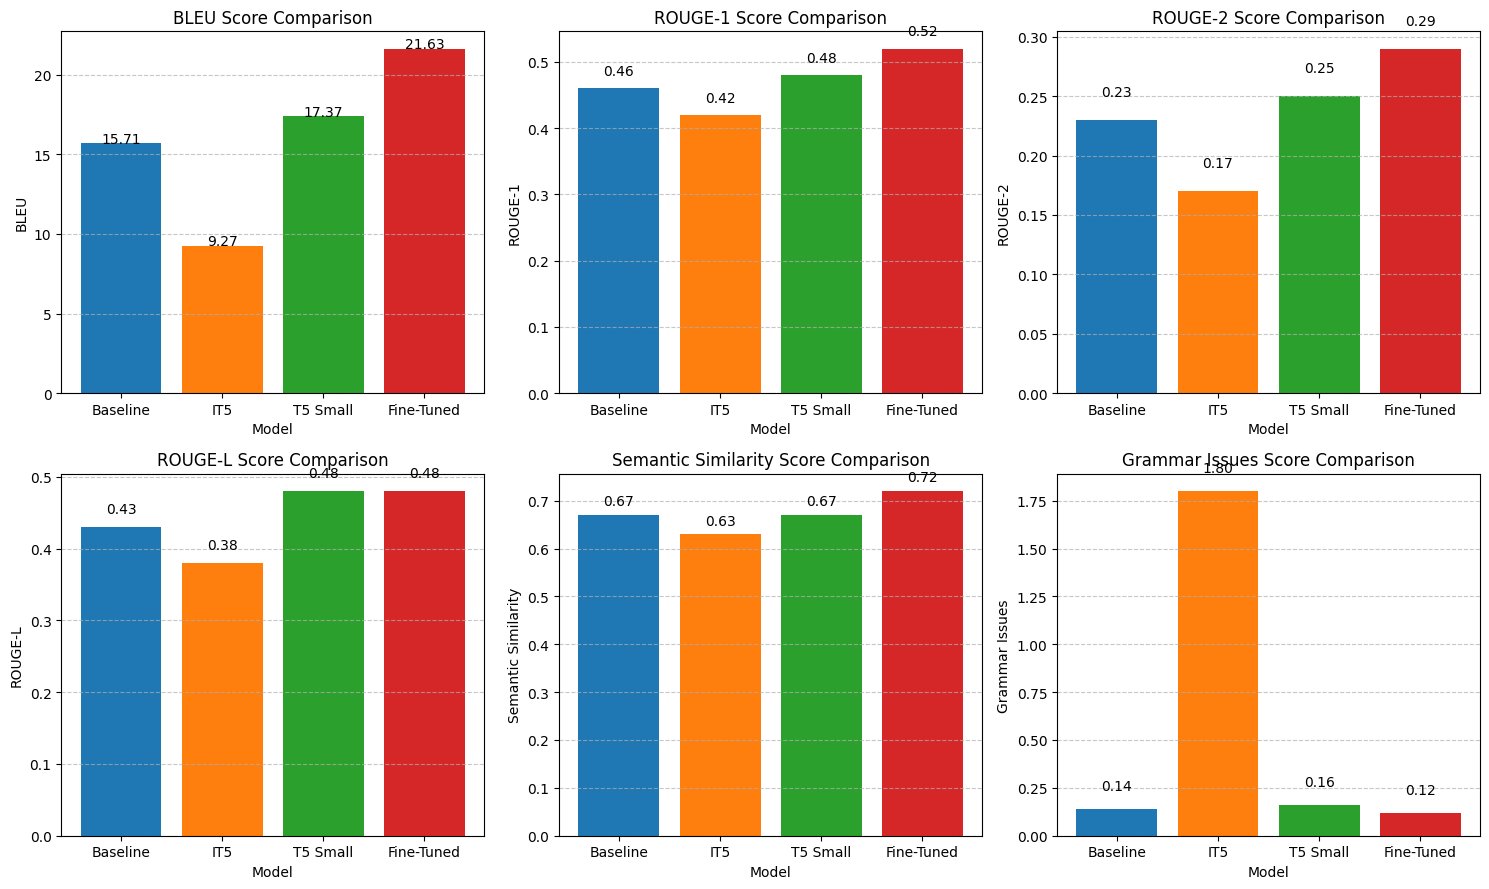

###  Fine-Tuned Model vs. Baseline
- **BLEU**: The Fine-Tuned Model achieves **21.63**, a significant improvement over the Baseline's **15.71** (+37.6%), reflecting better precision in text generation.
- **ROUGE Scores**:
  - **ROUGE-1**: Increased from **0.46** to **0.52** (+13%).
  - **ROUGE-2**: Increased from **0.23** to **0.29** (+26%).
  - **ROUGE-L**: Increased from **0.43** to **0.48** (+11.6%).
- **Semantic Similarity**: Improved from **0.67** to **0.72**, indicating closer alignment with expected outputs.
- **Grammar Issues**: Reduced from **0.14** to **0.12**, showing improved fluency and grammatical correctness.


### Fine-Tuned Model vs. IT5
- **BLEU**: The Fine-Tuned Model's BLEU score (**21.63**) is more than double IT5's **9.27**, indicating a substantial improvement in text overlap with the references.
- **ROUGE Scores**:
  - **ROUGE-1**: Increased from **0.42** to **0.52** (+23.8%).
  - **ROUGE-2**: Increased from **0.17** to **0.29** (+70.6%).
  - **ROUGE-L**: Increased from **0.38** to **0.48** (+26.3%).
- **Semantic Similarity**: Improved from **0.63** to **0.72**, reflecting better understanding and relevance.
- **Grammar Issues**: Drastically reduced from **1.8** to **0.12**, indicating much better fluency and grammatical correctness.


### Fine-Tuned Model vs. T5 Small
- **BLEU**: The Fine-Tuned Model achieves **21.63**, surpassing T5 Small's **17.37** (+24.5%), highlighting its superior precision.
- **ROUGE Scores**:
  - **ROUGE-1**: Improved from **0.48** to **0.52** (+8.3%).
  - **ROUGE-2**: Improved from **0.25** to **0.29** (+16%).
  - **ROUGE-L**: Equal at **0.48**, but with an edge in BLEU and semantic similarity.
- **Semantic Similarity**: Improved from **0.67** to **0.72**, showing enhanced relevance and coherence.
- **Grammar Issues**: Reduced from **0.16** to **0.12**, demonstrating improved fluency.

---

## Analysis of the Results

The improvement were observed accross all metric over the baseline model

1. **Higher BLEU and ROUGE Scores**: The Fine-Tuned Model achieves superior precision and recall, ensuring better overlap and relevance.
2. **Improved Semantic Similarity**: Aligns more closely with the expected outputs compared to all other methods.
3. **Fluency and Grammar**: Demonstrates the least grammar issues, highlighting better text generation quality.
4. **Task-Specific Optimization**: Fine-tuning significantly boosts performance across all metrics, proving the effectiveness of tailoring models for specific tasks.

---

## Future Work
- Implementing the `pipeline("summarization")` to summarize the context, and then generating questions based on the summarized content to ensure more meaningful and relevant queries.
- Grammar issues were reduced by 9%, but there is still potential for further improvements in this area.
- We were unable to integrate the **Qwen** and **LLaMA** models for question generation. Future work could focus on incorporating these models to enhance the question generation process.
